In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('mushrooms.csv')
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


This the overall dataset class is the target variable all of the columns of data contain object data type.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
df.shape

(8124, 23)

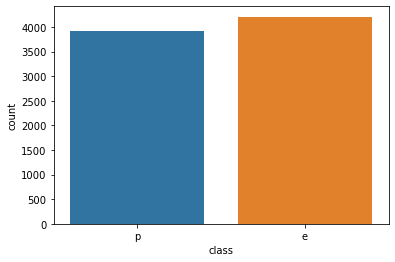

In [6]:
sns.countplot(data=df,x='class')
plt.show()

In [7]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [8]:
for col in df.columns:
    print(col,'Unique Values in Column:-',len(df[col].unique()),'\n', df[col].unique())

class Unique Values in Column:- 2 
 ['p' 'e']
cap-shape Unique Values in Column:- 6 
 ['x' 'b' 's' 'f' 'k' 'c']
cap-surface Unique Values in Column:- 4 
 ['s' 'y' 'f' 'g']
cap-color Unique Values in Column:- 10 
 ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises Unique Values in Column:- 2 
 ['t' 'f']
odor Unique Values in Column:- 9 
 ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment Unique Values in Column:- 2 
 ['f' 'a']
gill-spacing Unique Values in Column:- 2 
 ['c' 'w']
gill-size Unique Values in Column:- 2 
 ['n' 'b']
gill-color Unique Values in Column:- 12 
 ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape Unique Values in Column:- 2 
 ['e' 't']
stalk-root Unique Values in Column:- 5 
 ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring Unique Values in Column:- 4 
 ['s' 'f' 'k' 'y']
stalk-surface-below-ring Unique Values in Column:- 4 
 ['s' 'f' 'y' 'k']
stalk-color-above-ring Unique Values in Column:- 9 
 ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-rin

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
for col in df.columns:
    if df[col].dtypes == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])

In [11]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


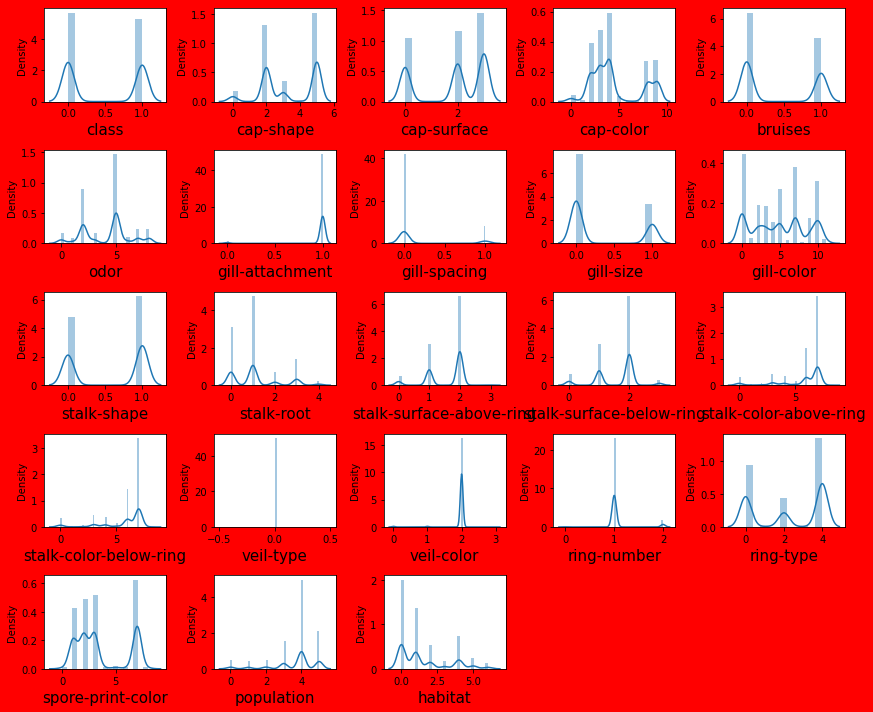

In [12]:
plt.figure(figsize =(12,10),facecolor='red')
plotnumber = 1

for column in df:
    if plotnumber<=23:
        ax = plt.subplot(5,5,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize =15)

    plotnumber+=1
plt.tight_layout()


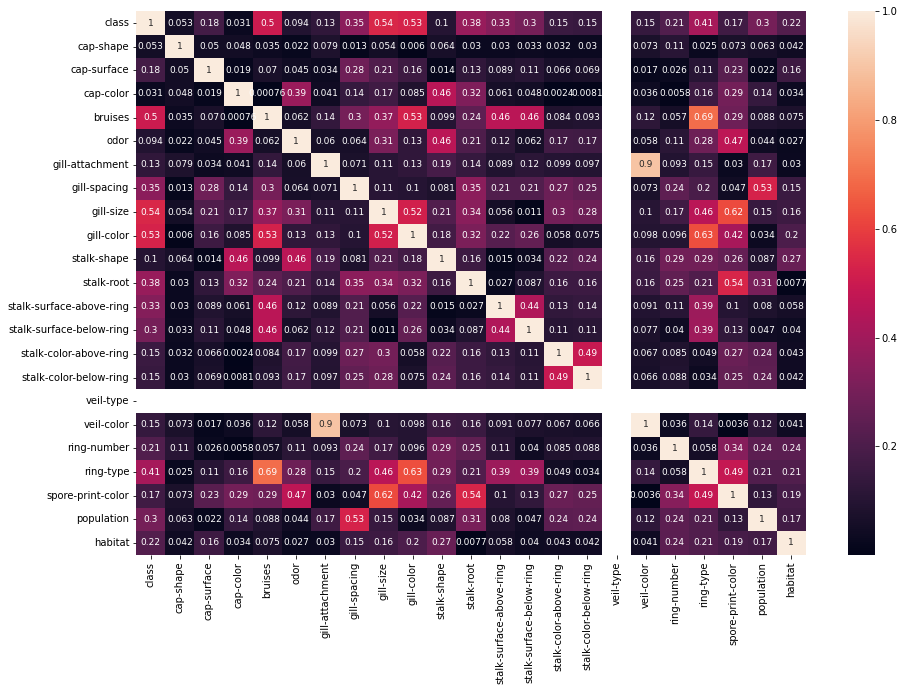

In [13]:
df_corr = df.corr().abs()

plt.figure(figsize =(15,10))
sns.heatmap(df_corr,annot = True, annot_kws={'size':9})
plt.show()

In [14]:
X = df.drop(columns ='class')
y = df['class']

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
from sklearn.decomposition import PCA

In [17]:
pca = PCA()
pca.fit_transform(X_scaled)

array([[-5.74321902e-01, -9.75781349e-01, -1.22176154e+00, ...,
        -2.08581362e-01,  8.13996758e-03, -1.86965391e-18],
       [-2.28210230e+00,  2.79066333e-01, -1.20049669e+00, ...,
         1.52238789e-01, -1.96446132e-01,  5.11387176e-18],
       [-1.85803562e+00, -2.70972362e-01, -1.37237069e+00, ...,
         2.57581784e-01, -3.62577199e-01,  2.26857503e-18],
       ...,
       [-1.62151632e+00, -7.57536709e-01,  2.73357994e+00, ...,
        -1.42532241e+00,  6.36990122e-01,  8.23729756e-20],
       [ 3.67060561e+00, -1.03277450e+00,  1.68459501e-01, ...,
         9.41440123e-02, -6.43462238e-02, -4.67946395e-21],
       [-1.57520272e+00, -1.22858140e+00,  2.44722789e+00, ...,
        -8.04626064e-01,  5.90315263e-01,  8.73464948e-21]])

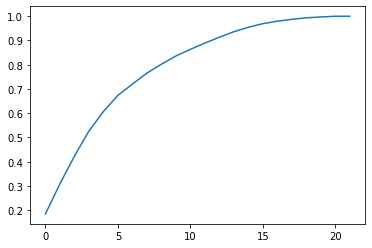

In [18]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [19]:
pca = PCA(n_components=18)
new_pcomp = pca.fit_transform(X_scaled)
X_scaled = pd.DataFrame(new_pcomp,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15',
                                             'PC16','PC17','PC18'])
X_scaled

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
0,-0.574322,-0.975781,-1.221762,0.185505,-1.451920,-1.538255,1.206300,1.545333,1.604984,0.405963,-0.690598,0.821627,0.080134,0.611855,-0.519966,-0.782544,1.120259,-0.004570
1,-2.282102,0.279066,-1.200497,0.272056,-1.501531,-1.486986,1.082778,-0.340684,-0.661795,-0.158524,0.194346,-1.387830,-0.185504,-0.916553,-0.113078,-0.730934,-0.018174,0.366562
2,-1.858036,-0.270972,-1.372371,1.055963,-1.810316,-0.874188,-1.768193,-0.286344,0.674741,0.339317,-0.293566,-0.511113,-0.033061,-0.519470,0.016525,-0.656167,0.107914,-0.181087
3,-0.884780,-0.756468,-1.342068,0.370162,-2.111239,-2.110207,1.089952,1.243782,0.709039,0.478215,-1.285118,1.213600,0.434106,0.025716,-0.059661,-0.454026,0.994198,-0.082612
4,0.689613,1.239262,-3.113237,0.814721,1.541685,-0.555917,0.585614,1.598763,-0.851453,1.436707,-0.015359,-1.260035,-0.682285,0.517256,-0.514080,0.242658,-0.311933,-0.587410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,-2.244846,-0.918550,2.528736,6.454448,2.787473,-1.331338,0.279874,0.608317,-0.045671,-0.306721,-0.217630,-0.020337,-0.158988,0.172495,0.578367,-0.785825,-0.352718,-1.443473
8120,-2.538760,-1.671721,4.324498,7.525921,3.974776,-2.180670,1.672122,0.209774,0.240103,-1.534567,-0.394144,0.902619,0.297831,0.137499,-0.213379,1.047612,-0.542112,-0.091820
8121,-1.621516,-0.757537,2.733580,6.453626,2.478209,-1.573928,-0.323965,0.299329,0.205339,-0.187161,-0.264708,-0.659029,-0.149918,-0.182540,-0.519613,-0.707687,0.225785,-1.453860
8122,3.670606,-1.032774,0.168460,-0.146535,-0.153971,-0.456976,-0.335280,-0.190521,-0.194496,-0.158677,-1.404525,0.238808,0.007232,-0.004265,-0.086884,-0.114642,-0.148014,-0.121415


In [20]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [25]:
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,roc_curve,confusion_matrix

In [22]:
MaxAccu=0
MaxR=0
for i in range(0,200):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,random_state = i,test_size = 0.20)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    acc=accuracy_score(y_test,pred_test)
    print('accuracy',acc,'random_state',i)
    
    if acc>MaxAccu:
        MaxAccu = acc
        MaxR=i
        print('accuracy',MaxAccu,'random_state',i)
   

accuracy 0.955076923076923 random_state 0
accuracy 0.955076923076923 random_state 0
accuracy 0.952 random_state 1
accuracy 0.9495384615384616 random_state 2
accuracy 0.9489230769230769 random_state 3
accuracy 0.9569230769230769 random_state 4
accuracy 0.9569230769230769 random_state 4
accuracy 0.9507692307692308 random_state 5
accuracy 0.9526153846153846 random_state 6
accuracy 0.9624615384615385 random_state 7
accuracy 0.9624615384615385 random_state 7
accuracy 0.9452307692307692 random_state 8
accuracy 0.9458461538461539 random_state 9
accuracy 0.9544615384615385 random_state 10
accuracy 0.9366153846153846 random_state 11
accuracy 0.963076923076923 random_state 12
accuracy 0.963076923076923 random_state 12
accuracy 0.9544615384615385 random_state 13
accuracy 0.9458461538461539 random_state 14
accuracy 0.9501538461538461 random_state 15
accuracy 0.9526153846153846 random_state 16
accuracy 0.9563076923076923 random_state 17
accuracy 0.9556923076923077 random_state 18
accuracy 0.9556923

In [23]:
print('Best Acuracy',MaxAccu,'Random State',MaxR)

Best Acuracy 0.9698461538461538 Random State 21


In [26]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,random_state = 65,test_size = 0.20)
lr.fit(x_train,y_train)
pred_train = lr.predict(x_train)
pred_test = lr.predict(x_test)
print(accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

0.952
[[820  33]
 [ 45 727]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       853
           1       0.96      0.94      0.95       772

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



In [27]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
predt = dt.predict(x_test)
print('Accuracy',accuracy_score(y_test,predt))
print(confusion_matrix(y_test,predt))
print(classification_report(y_test,predt))

Accuracy 0.992
[[848   5]
 [  8 764]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       853
           1       0.99      0.99      0.99       772

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



In [28]:
from sklearn.ensemble import RandomForestClassifier

rt = RandomForestClassifier()
rt.fit(x_train,y_train)
prert = rt.predict(x_test)
print('Accuracy',accuracy_score(y_test,prert))
print(confusion_matrix(y_test,prert))
print(classification_report(y_test,prert))

Accuracy 1.0
[[853   0]
 [  0 772]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       853
           1       1.00      1.00      1.00       772

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [29]:
from sklearn.svm import SVC

st = SVC()
st.fit(x_train,y_train)
prest = st.predict(x_test)
print('Accuracy',accuracy_score(y_test,prest))
print(confusion_matrix(y_test,prest))
print(classification_report(y_test,prest))

Accuracy 1.0
[[853   0]
 [  0 772]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       853
           1       1.00      1.00      1.00       772

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [ ]:
Here SVC and Random Forest are giving highest and best accuracy. I am finalising SVC the finla model

In [30]:
import pickle
file = open('Mushroom.pkl', 'wb')
pickle.dump(st, file)
model=open('Mushroom.pkl', 'rb')
InsuranceCliam_moel=pickle.load(model)